#### Notebook to test plasticity network. 
#### Different parameters are defined in dictionaries. 
#### Run simulation with simulate() and get the rates and plastic weights as dictionaries.

In [1]:
import time
import random
import math
import numba as nb
import numpy as np
from numba import njit
from numba import types
from numba.typed import Dict
from utils import *
from simulate import *
from plot import *

In [2]:
from numba.typed import Dict
weight_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
neurons_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
stim_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
flag_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
rates_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
eta_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
fixed_inp = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
stim_params = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)

rates = Dict.empty(key_type=types.unicode_type, value_type=types.float64[:,:] )
weights = Dict.empty(key_type=types.unicode_type, value_type=types.float64[:])

weight_dict['wed']  = 1.5
weight_dict['wpe']  = 1.5
weight_dict['wpp']  = 0.5
weight_dict['wse']  = 1
weight_dict['wve']  = 1
weight_dict['wde']  = 1.5
weight_dict['wsv']  = 0.6
weight_dict['wvs']  = 0.5
weight_dict['wep']  = 1.75
weight_dict['wpv']  = 0.6
weight_dict['wps']  = 0.3
weight_dict['wds']  = 0.35


o_wep = 3.19
o_wpv = 0.13124999999999998 
o_wps = 0.765625 
o_wds = 1.49

stim = 10


rates_dict['re'] = 1.0
rates_dict['rd'] = 0.0
rates_dict['rp'] = 2.0
rates_dict['rs'] = 2.0
rates_dict['rv'] = 8.0

xE = rates_dict['re'] - weight_dict['wed'] * rates_dict['rd'] + o_wep * rates_dict['rp'] 
xD = 0
xP = rates_dict['rp']  * (1.0 + weight_dict['wpp']) - weight_dict['wpe'] * rates_dict['re'] + o_wps * rates_dict['rs'] + o_wpv * rates_dict['rv']
xS = rates_dict['rs'] - weight_dict['wse'] * rates_dict['re'] + weight_dict['wsv'] * rates_dict['rv'] 
xV = rates_dict['rv'] - weight_dict['wve'] * rates_dict['re'] + weight_dict['wvs'] * rates_dict['rs'] 

print(xE, xD, xP, xS, xV)

neurons_dict['Ne']  = 70
neurons_dict['Ni']  = 10

stim_dict['Ve']     = 1
stim_dict['Vp']     = 0
stim_dict['Mp']     = 1
stim_dict['Vs']     = 0
stim_dict['Ms']     = 1
stim_dict['Vv']     = 1
stim_dict['Mv']     = 0
stim_dict['Md']     = 1

stim_params['stim_value'] = stim
stim_params['stim_dur'] = 6000
stim_params['no_vis_stim'] = 1500

fixed_inp['xe'] = xE
fixed_inp['xd'] = xD
fixed_inp['xp'] = xP
fixed_inp['xs'] = xS
fixed_inp['xv'] = xV

eta_dict['η1'] = 1e-6
eta_dict['η2'] = 1e-6
eta_dict['η3'] = 1e-7
eta_dict['η4'] = 1e-7

flag_dict['test'] = 0
flag_dict['opto_gen'] = 0
flag_dict['neuron_flag'] = 0
flag_dict['opto_val'] = 0


7.38 0 4.08125 5.8 8.0


In [3]:
rates, weights = Simulate(weight_dict, neurons_dict, rates_dict, stim_dict, eta_dict, flag_dict, stim_params, fixed_inp, rates, weights)

In [4]:
re = rates['re']
rd = rates['rd']
rs = rates['rs']
rv = rates['rv']
rp = rates['rp']

wds_track = weights['w_ds']
wep_track = weights['w_ep']
wpv_track = weights['w_pv']
wps_track = weights['w_ps']

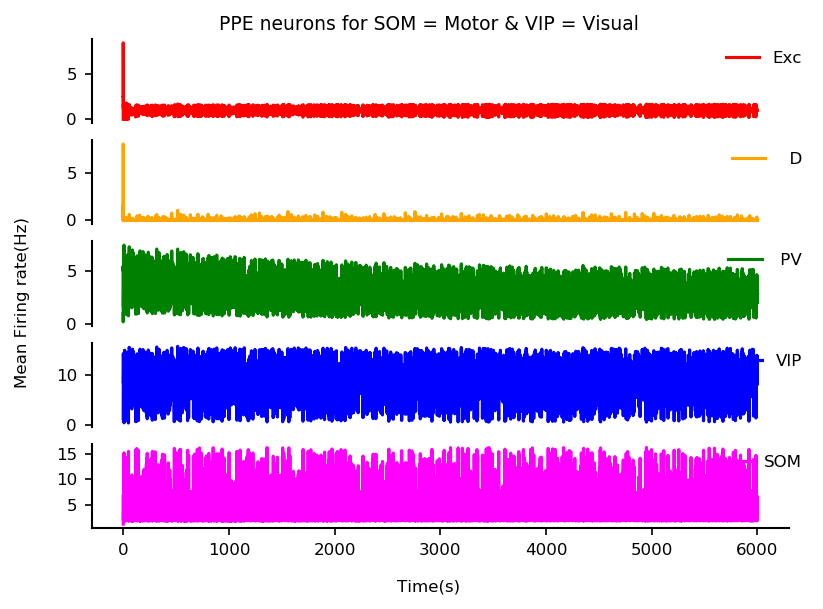

In [5]:
plot_rates(re,rd,rp,rv,rs,stim_params['stim_dur'],'rates_plastic_network.png')

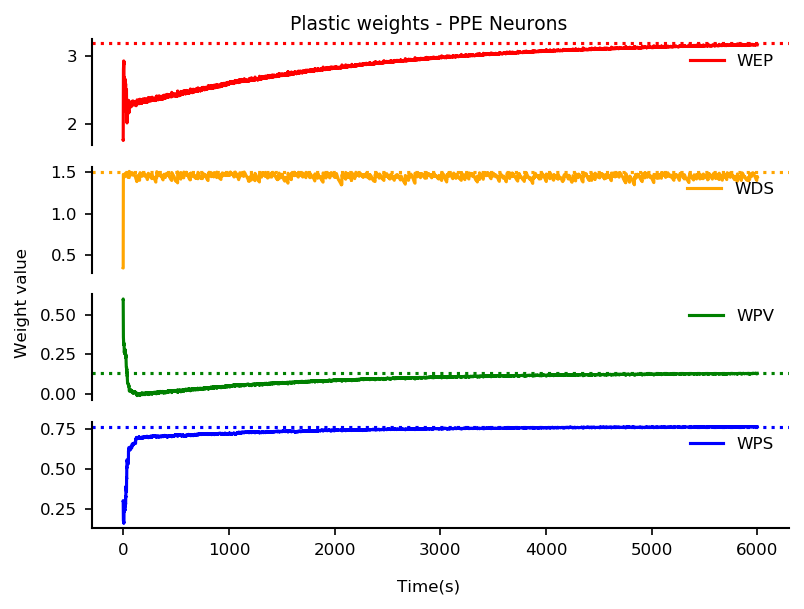

In [6]:
plot_plastic_weights(wpv_track, wps_track, wep_track, wds_track, o_wpv, o_wps, o_wds, o_wep, stim_params['stim_dur'],'weights_plastic_network.png')